In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from tab_transformer_pytorch import TabTransformer, FTTransformer
from preprocessing import get_features_and_target
from sklearn.preprocessing import LabelEncoder
from RMSELoss import RMSELoss

# Getting Dataframe

In [2]:
train_df = pd.read_csv("data/train_data.csv")
dev_df = pd.read_csv("data/development_data.csv")

target_column = "PullTest (N)"  

x_train, y_train = get_features_and_target(train_df, target_column)
x_dev, y_dev = get_features_and_target(dev_df, target_column)



# Encode Categorical_Features

In [3]:
# Define the categorical features
categorical_features = ["Material"]

le = LabelEncoder()

for feature in categorical_features:
    x_train[feature] = le.fit_transform(x_train[feature])
    x_dev[feature] = le.transform(x_dev[feature])  

In [4]:
print(x_train)

     Pressure (PSI)  Welding Time (ms)  Angle (Deg)  Force (N)  Current (A)  \
0                80                800            0     115.54      2929.03   
1                95                200           15       8.31      1075.09   
2                60               1200            0      97.09      4161.74   
3                60                400            0      93.01      3140.98   
4                80               1000            0      96.29      3615.49   
..              ...                ...          ...        ...          ...   
269              60                600           15      94.39      4167.94   
270              60                800           15      75.04      4022.19   
271              80               1000            0     104.82      3291.78   
272              60                400            0      92.98      3047.60   
273              80                600            0     107.67      3523.46   

     Thickness A (mm)  Thickness B (mm)  Material  

# Split Categorical_Features

In [4]:
# Drop categorical features to get the continuous features
x_train_numerical_features = x_train.drop(categorical_features, axis=1)
x_dev_numerical_features = x_dev.drop(categorical_features, axis=1)

# Seperate the categorical features
x_train_categorical_features = x_train[categorical_features]
x_dev_categorical_features = x_dev[categorical_features]

# Change df into Tensors

In [5]:
train_tensor = torch.tensor(x_train.to_numpy(), dtype=torch.float)
x_train_numer_tensor = torch.tensor(x_train_numerical_features.to_numpy(),dtype=torch.float)
x_dev_numer_tensor = torch.tensor(x_dev_numerical_features.to_numpy(),dtype=torch.float)

dev_tensor = torch.tensor(x_dev.to_numpy(), dtype=torch.float)
x_train_categorical_features_tensor = torch.tensor(x_train_categorical_features.to_numpy(),dtype=torch.float)
x_dev_categorical_features_tensor = torch.tensor(x_dev_categorical_features.to_numpy(),dtype=torch.float)


In [21]:
torch.set_printoptions(sci_mode=False, precision=3)
print(x_train_numer_tensor)

tensor([[   80.000,   800.000,     0.000,  ...,     0.625,     0.631,
             1.256],
        [   95.000,   200.000,    15.000,  ...,     0.946,     0.939,
             1.885],
        [   60.000,  1200.000,     0.000,  ...,     0.615,     0.619,
             1.234],
        ...,
        [   80.000,  1000.000,     0.000,  ...,     0.626,     0.624,
             1.250],
        [   60.000,   400.000,     0.000,  ...,     0.636,     0.632,
             1.268],
        [   80.000,   600.000,     0.000,  ...,     0.623,     0.618,
             1.241]])


# Not Working

In [ ]:

import torch.nn as nn
import torch.optim as optim

model = FTTransformer(
    categories=(len(le.classes_),),
    num_continuous=X_train.shape[1] - 1,
    dim=128,
    dim_out=1,
    depth=6,
    heads=8,
    attn_dropout=0.9,
    ff_dropout=0.9
)

import plotly.graph_objects as go

train_losses = []
val_losses = []

for epoch in range(10):
    model.train()
    epoch_train_loss = 0
    for x_categ, x_numer, y_train in train_loader:
        optimizer.zero_grad()
        preds = model(x_categ, x_numer).squeeze()
        loss = criterion(preds, y_train)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # Validation
    model.eval()
    epoch_val_loss = 0
    with torch.no_grad():
        for x_categ, x_numer, y_train in val_loader:
            preds = model(x_categ, x_numer).squeeze()
            loss = criterion(preds, y_train)
            epoch_val_loss += loss.item()
    
    avg_val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")



NameError: name 'train_loader' is not defined

In [ ]:
print(x_train_numerical_features.shape[1])

8


In [21]:
from torch.utils.data import DataLoader

train_ds = WeldingDataset(X_train, y_train)
val_ds = WeldingDataset(X_val, y_val)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=32)


NameError: name 'WeldingDataset' is not defined

# Define Model

In [6]:
# categories is defined as a tuple, we only have one categorical feature "Material"
# the second parameter has to be empty for the model to work correctly
# in hard numbers this is displaying (1,)
model = FTTransformer(
    categories=(x_train_categorical_features.shape[1],),
    num_continuous=x_train_numerical_features.shape[1],
    dim=8,
    dim_out=1,
    depth=4,
    heads=4,
    attn_dropout=0.3,
    ff_dropout=0.3
)

# Define Training

In [7]:
criterion = RMSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.00025)

#prev lr = 0.01
#dropout prev 0,3

# Training and Validation Loop
num_epochs = 10000
train_losses = []
val_losses = []

# Create datasets for training & validation, download if necessary
train_set = train_tensor
val_set = dev_tensor

# Create data loaders for our datasets; shuffle for training, not for validation
train_loader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=4, shuffle=False)

# Training

In [8]:


for epoch in range(num_epochs):

    # Training
    model.train()
    epoch_train_loss = 0
    for x_dev_categorical_features, x_train_numerical_features, y_train in train_loader:
        optimizer.zero_grad()
        preds = model(x_categ, x_numer).squeeze()
        loss = criterion(preds, y_train)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()
    avg_train_loss = epoch_train_loss / len(train_loader)
    train_losses.append(avg_train_loss)


    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

ValueError: too many values to unpack (expected 3)

In [9]:
def train_one_epoch(epoch_index):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(train_loader):
        # Every data instance is an input + label pair
        inputs, labels = data

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = criterion(outputs, y_train)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss

In [ ]:
# Initializing in a separate cell so we can easily add more epochs to the same run
from datetime import datetime


timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')

epoch_number = 0

EPOCHS = 5

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(EPOCHS)


    running_vloss = 0.0
    # Set the model to evaluation mode, disabling dropout and using population
    # statistics for batch normalization.
    model.eval()

    # Disable gradient computation and reduce memory consumption.
    with torch.no_grad():
        for i, vdata in enumerate(val_loader):
            vinputs, vlabels = vdata
            voutputs = model(vinputs)
            vloss = criterion(voutputs, vlabels)
            running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss
        model_path = 'model_{}_{}'.format(timestamp, epoch_number)
        torch.save(model.state_dict(), model_path)

    epoch_number += 1

EPOCH 1:


ValueError: too many values to unpack (expected 2)

In [ ]:

    # Validation
    model.eval()
    epoch_val_loss = 0
    
    with torch.no_grad():
        for x_categ, x_numer, y_train in val_loader:
            preds = model(x_categ, x_numer).squeeze()
            loss = criterion(preds, y_train)
            epoch_val_loss += loss.item()
    avg_val_loss = epoch_val_loss / len(val_loader)
    val_losses.append(avg_val_loss)

In [83]:
print(x_numer)

tensor([[   80.000,   800.000,     0.000,   114.380,  3430.460,     0.634,
             0.639,     1.273],
        [   80.000,   600.000,     0.000,   107.910,  3023.800,     0.616,
             0.618,     1.234],
        [   60.000,  1200.000,     0.000,    97.350,  3971.850,     0.630,
             0.628,     1.258],
        [   60.000,   400.000,    15.000,    95.040,  3112.930,     0.621,
             0.622,     1.243],
        [   60.000,   800.000,    15.000,    78.090,  3709.420,     0.630,
             0.624,     1.254],
        [   60.000,  1000.000,    15.000,    75.670,  3490.110,     0.631,
             0.635,     1.266],
        [   95.000,  1500.000,    15.000,   122.480,  1252.440,     0.947,
             0.957,     1.904],
        [   60.000,   400.000,     0.000,    91.900,  3344.140,     0.642,
             0.636,     1.278],
        [   60.000,   800.000,    15.000,    79.070,  3589.710,     0.638,
             0.628,     1.266],
        [   60.000,   800.000,    15.

In [78]:
from sklearn.model_selection import ParameterGrid
import torch
import numpy as np

param_grid = {
    "dim":       [2, 4, 8],
    "depth":     [2, 4],
    "heads":     [2, 4],
    "attn_dropout":[0.1],
    "ff_dropout":[0.1],
    "lr":        [0.00025, 0.0003],
    "weight_decay":[0, 0.00001]
}

def run_experiment(params, train_loader, val_loader):
    results = []
    for params in ParameterGrid(param_grid):
        # 1) Build model & optimizer
        model = FTTransformer(
            categories=(1,),
            num_continuous=8,
            dim=params["dim"],
            dim_out=1,
            depth=params["depth"],
            heads=params["heads"],
            attn_dropout=params["attn_dropout"],
            ff_dropout=params["ff_dropout"]
        )
        optimizer = torch.optim.AdamW(
            model.parameters(),
            lr=params["lr"],
            weight_decay=params["weight_decay"]
        )
        criterion = RMSELoss()


    

        #prev lr = 0.01
        #dropout prev 0,3

        # Training and Validation Loop
        num_epochs = 5
        train_losses = []
        val_losses = []

        for epoch in range(num_epochs):
            model.train()
            epoch_train_loss = 0
            for x_categ, x_numer, target in train_loader:
                optimizer.zero_grad()
                preds = model(x_categ, x_numer).squeeze()
                loss = criterion(preds, target)
                loss.backward()
                optimizer.step()
                epoch_train_loss += loss.item()
            avg_train_loss = epoch_train_loss / len(train_loader)
            train_losses.append(avg_train_loss)

            # Validation
            model.eval()
            epoch_val_loss = 0
            
            with torch.no_grad():
                for x_categ, x_numer, target in val_loader:
                    preds = model(x_categ, x_numer).squeeze()
                    loss = criterion(preds, target)
                    epoch_val_loss += loss.item()
            avg_val_loss = epoch_val_loss / len(val_loader)
            val_losses.append(avg_val_loss)

            print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

        return avg_val_loss

best_score = float("inf")
best_params = None

for params in ParameterGrid(param_grid):
    val_rmse = run_experiment(params, train_loader, val_loader)
    
    if val_rmse < best_score:
        best_score = val_rmse
        best_params = params

print("Best validation RMSE:", best_score)
print("Best hyperparameters:", best_params)

# 4) Find best combination
best = min(results, key=lambda r: r["val_rmse"])
print("Best params:", best)


Epoch 1 | Train Loss: 2976.7572 | Val Loss: 2924.7802
Epoch 2 | Train Loss: 2977.2478 | Val Loss: 2924.7760
Epoch 3 | Train Loss: 2977.9204 | Val Loss: 2924.7716
Epoch 4 | Train Loss: 2975.7538 | Val Loss: 2924.7672
Epoch 5 | Train Loss: 2979.7818 | Val Loss: 2924.7627
Epoch 1 | Train Loss: 2971.9565 | Val Loss: 2924.4955
Epoch 2 | Train Loss: 2979.7187 | Val Loss: 2924.4919
Epoch 3 | Train Loss: 2979.4065 | Val Loss: 2924.4879
Epoch 4 | Train Loss: 2980.2289 | Val Loss: 2924.4840
Epoch 5 | Train Loss: 2975.9389 | Val Loss: 2924.4802
Epoch 1 | Train Loss: 2979.1885 | Val Loss: 2925.5944
Epoch 2 | Train Loss: 2975.3978 | Val Loss: 2925.5901
Epoch 3 | Train Loss: 2976.8512 | Val Loss: 2925.5862
Epoch 4 | Train Loss: 2976.6139 | Val Loss: 2925.5824
Epoch 5 | Train Loss: 2979.4840 | Val Loss: 2925.5784
Epoch 1 | Train Loss: 2975.7920 | Val Loss: 2924.5214
Epoch 2 | Train Loss: 2977.7928 | Val Loss: 2924.5172
Epoch 3 | Train Loss: 2977.5975 | Val Loss: 2924.5135
Epoch 4 | Train Loss: 2977.7

ValueError: min() arg is an empty sequence

In [78]:
df.head()

,Sample ID,Pressure (PSI),Welding Time (ms),Angle (Deg),Force (N),Current (A),Thickness A (mm),Thickness B (mm),Material,PullTest (N),NuggetDiameter (mm),Category,Comments,Thickness A+B (mm)
0,101,80,800,0,115.54,2929.03,0.625,0.631,AISI 1010 carbon steel,2683.1,3.41,Good,NaN,1.256
1,31,95,200,15,8.31,1075.09,0.946,0.939,AISI 1010 carbon steel,2667.3,2.81,Bad,DOE,1.885
2,493,60,1200,0,97.09,4161.74,0.615,0.619,AISI 1010 carbon steel,2730.3,3.58,Good,NaN,1.234
3,219,60,400,0,93.01,3140.98,0.621,0.632,AISI 1010 carbon steel,2748.3,3.38,Good,NaN,1.253
4,60,80,1000,0,96.29,3615.49,0.631,0.640,AISI 1010 carbon steel,2946.9,3.73,Good,NaN,1.271


In [81]:
X.head()

,Pressure (PSI),Welding Time (ms),Angle (Deg),Force (N),Current (A),Thickness A (mm),Thickness B (mm),Material,Thickness A+B (mm)
0,80,800,0,115.54,2929.03,0.625,0.631,0,1.256
1,95,200,15,8.31,1075.09,0.946,0.939,0,1.885
2,60,1200,0,97.09,4161.74,0.615,0.619,0,1.234
3,60,400,0,93.01,3140.98,0.621,0.632,0,1.253
4,80,1000,0,96.29,3615.49,0.631,0.640,0,1.271


In [74]:
import plotly.graph_objects as go

fig = go.Figure()

# Training loss trace
fig.add_trace(go.Scatter(
    y=train_losses,
    mode="lines+markers",
    name="Train Loss",
    line=dict(color="royalblue", width=2),
    marker=dict(size=4)
))

# Validation loss trace
fig.add_trace(go.Scatter(
    y=val_losses,
    mode="lines+markers",
    name="Validation Loss",
    line=dict(color="tomato", width=2),
    marker=dict(size=4)
))

# Layout
fig.update_layout(
    title="Training & Validation Loss over Epochs",
    xaxis_title="Epoch",
    yaxis_title="Loss",
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(00, 10000, 500)),  # Show ticks every 100 epochs
        tickfont=dict(size=10)
    ),
    template="plotly_white",
    legend=dict(x=0.05, y= -0.25, bgcolor="rgba(255,255,255,0)", borderwidth=0)
)

fig.show()


In [62]:
import plotly.graph_objects as go

epochs = list(range(1, len(train_losses) + 1))

fig = go.Figure()

# Training loss trace
fig.add_trace(go.Scatter(
    x=epochs,
    y=train_losses,
    mode="lines",
    name="Training Loss",
    line=dict(color="royalblue", width=2)
))

# Validation loss trace
fig.add_trace(go.Scatter(
    x=epochs,
    y=val_losses,
    mode="lines",
    name="Validation Loss",
    line=dict(color="firebrick", width=2, dash="dash")
))

# Layout enhancements
fig.update_layout(
    title="Training & Validation Loss over 100 Epochs",
    xaxis_title="Epoch",
    yaxis_title="Loss",
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(0, 10000, 500)),  # Show ticks every 100 epochs
        tickfont=dict(size=10)
    ),
    yaxis=dict(
        tickformat=".2e" if max(train_losses + val_losses) > 1e4 else ".4f",  # Dynamic formatting
        gridcolor="lightgray"
    ),
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    template="plotly_white",
    margin=dict(t=60, b=40)
)

fig.show()


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Collect predictions and true values from the validation set
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for x_categ, x_numer, y_train in val_loader:
        preds = model(x_categ, x_numer).squeeze().cpu().numpy()
        all_preds.extend(preds)
        all_targets.extend(y_train.cpu().numpy())

all_preds = np.array(all_preds)
all_targets = np.array(all_targets)

# Inverse-transform predictions and targets to original units
preds_orig = scaler_y.inverse_transform(all_preds.reshape(-1, 1)).flatten()
targets_orig = scaler_y.inverse_transform(all_targets.reshape(-1, 1)).flatten()

# Calculate MAE and RMSE in original units
mae = mean_absolute_error(targets_orig, preds_orig)
rmse = np.sqrt(mean_squared_error(targets_orig, preds_orig))

print(f"MAE (original units): {mae:.2f}")
print(f"RMSE (original units): {rmse:.2f}")

MAE (original units): 1165442.88
RMSE (original units): 1173865.10


In [ ]:

regressor.fit(X_train, y_train)

predictions = regressor.predict(X_dev)

mse = mean_squared_error(y_dev, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_dev, predictions)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

abs_errors = np.abs(predictions - y_dev)
sorted_errors = np.sort(abs_errors)
cdf = np.arange(1, len(sorted_errors)+1) / len(sorted_errors)

plt.figure(figsize=(8, 5))
plt.plot(sorted_errors, cdf, marker='.', linestyle='none')
plt.xlabel('Absolute Error |y_pred - y_true|')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Absolute Errors')
plt.grid(True)
plt.show()

NameError: name 'predictions' is not defined

## Coefficient of Determination (R²)

The coefficient of determination, denoted as $( R^2 )$, is a commonly used metric to evaluate the performance of a regression model. It indicates how well the model explains the variance in the target variable \( y \).

### Definition

The formula for $( R^2 )$ is:

$$
R^2 = 1 - \frac{SS_{\text{res}}}{SS_{\text{tot}}}
$$

Where:

- $( SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2)$: Residual Sum of Squares (model error)
-  $(SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2)$: Total Sum of Squares (total variance in the data)

### Interpretation

- $( R^2 = 1)$: Perfect prediction – the model explains 100% of the variance in $( y)$
- $( R^2 = 0)$: The model does no better than simply predicting the mean of $( y )$
- $( R^2 < 0 )$: The model performs worse than a constant mean prediction

### Example

In this case, the model achieved an $( R^2 )$ score of **0.61**, which means it explains **61% of the total variance** in the target variable.

This is a moderate-to-good result, indicating that the model captures significant patterns in the data, but there is still room for improvement.

## Mean Squared Error (MSE)

The **Mean Squared Error (MSE)** is a standard regression metric that measures the average of the squared differences between the predicted values and the actual target values.

### Definition

$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

Where:

- $y_i$: true value  
- $\hat{y}_i$: predicted value  
- $n$: number of samples

### Interpretation

- MSE penalizes larger errors more strongly due to squaring.
- The result is in the **squared unit** of the target variable (e.g., mm², N², €²).
- A **lower MSE** indicates better prediction accuracy.
- Because of squaring, the MSE is sensitive to **outliers**.

### Example

In this case, the model yielded an MSE of **88,837**, which may seem large, but this must be interpreted in the context of the unit and range of the target variable.

## Root Mean Squared Error (RMSE)

The **Root Mean Squared Error (RMSE)** is the square root of the MSE and represents the average prediction error in the same unit as the target variable.

### Definition

$RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 } = \sqrt{MSE}$

### Interpretation

- RMSE is easier to interpret than MSE because it is in the **original unit** of the target variable.
- It gives a direct sense of **how far off predictions are**, on average.
- Like MSE, it is also sensitive to outliers due to the squaring.

### Example

In this case, the RMSE is approximately **298 N**.  
Given that the mean of the target variable (PullTest) is **2953 N**, this corresponds to a **relative prediction error of about 10.1 %**.

This means that, on average, the model's predictions deviate from the true pull test values by approximately 298 N.


In [12]:
results = {}

X_train_new = X_train.drop(columns=["Material", "Category", "Comments"])
X_dev_new = X_dev.drop(columns=["Material", "Category", "Comments"])

for name, model in models.items():
    model.fit(X_train_new, y_train)
    preds = model.predict(X_dev_new)
    
    mse = mean_squared_error(y_dev, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_dev, preds)
    
    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

NameError: name 'models' is not defined

In [29]:
results_df = pd.DataFrame(results).T
results_df = results_df.round(2)
print(results_df)

                     MSE    RMSE    R²
TabPFN          71549.75  267.49  0.69
Decision Tree   81260.90  285.06  0.64
Random Forest   73589.86  271.27  0.68
XGBoost        113405.48  336.76  0.50


In [ ]:
cdf_data = {}  

for name, model in models.items():
    model.fit(X_train_new, y_train)
    preds = model.predict(X_dev_new)
    
    mse = mean_squared_error(y_dev, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_dev, preds)
    
    results[name] = {
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }
    
    abs_errors = np.abs(preds - y_dev)
    sorted_errors = np.sort(abs_errors)
    cdf = np.arange(1, len(sorted_errors)+1) / len(sorted_errors)
    cdf_data[name] = (sorted_errors, cdf)

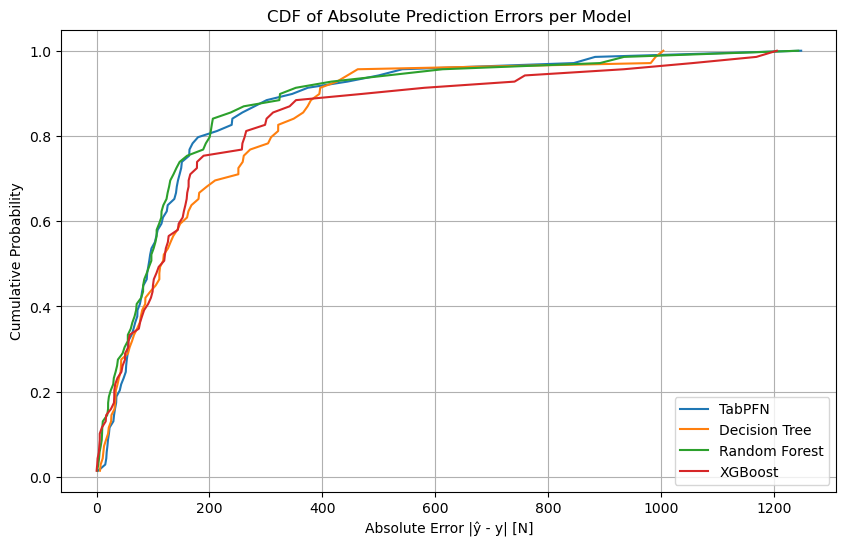

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for name, (errors, cdf) in cdf_data.items():
    plt.plot(errors, cdf, label=name)

plt.xlabel("Absolute Error |ŷ - y| [N]")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Absolute Prediction Errors per Model")
plt.grid(True)
plt.legend()
plt.show()